In [1]:
import sys
sys.path.append('./../../src')

# others shit
from matplotlib import pyplot

# my shit
from lib.stonk_jar import StonkJar

In [2]:
ticker = 'AAPL'
jar = StonkJar(ticker)

In [3]:
historical_pickle_name = "{0}.technical.historical.df.pkl".format(ticker)
data = jar.read_pickle_dataframe(historical_pickle_name)

In [4]:
data.describe()

,o,l,h,c,v,e_a,e_e,r_ss,r_s,r_h,r_b,r_sb
count,63766.000000,63766.000000,63766.000000,63766.000000,63766.000000,6.376600e+04,63766.000000,63766.000000,63766.000000,63766.000000,63766.000000,63766.000000
mean,198.202540,198.798937,198.875466,199.594132,50.097654,1.680000e+00,1.555857,0.015054,0.015054,0.178831,0.507775,0.283285
std,52.514127,52.672144,52.690478,52.882832,28.562268,2.220463e-16,0.000000,0.011332,0.011332,0.018763,0.033206,0.006620
min,120.317204,120.679241,120.739702,121.161958,1.000000,1.680000e+00,1.555857,0.000000,0.000000,0.158416,0.452830,0.278302
25%,153.498959,153.960842,154.015316,154.576685,25.000000,1.680000e+00,1.555857,0.000000,0.000000,0.158416,0.476415,0.278302
50%,190.898874,191.473294,191.530295,192.239187,50.000000,1.680000e+00,1.555857,0.023585,0.023585,0.174528,0.500000,0.278302
75%,236.610098,237.322064,237.419900,238.271352,75.000000,1.680000e+00,1.555857,0.023585,0.023585,0.198113,0.549505,0.292079
max,366.128118,367.229807,366.678963,368.698727,99.000000,1.680000e+00,1.555857,0.023585,0.023585,0.221698,0.549505,0.292079


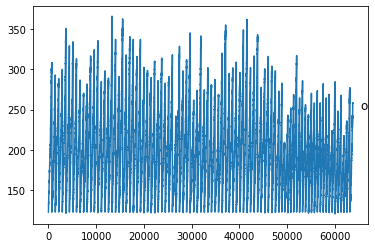

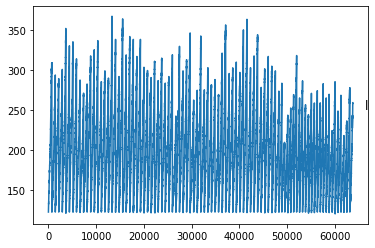

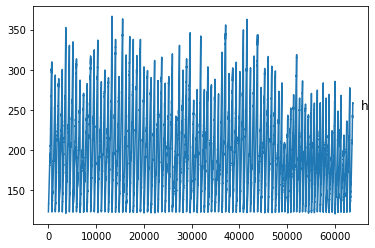

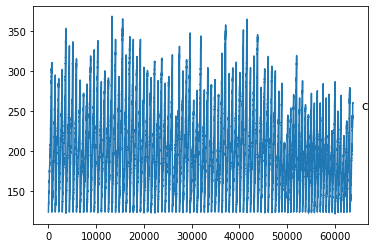

In [5]:
# specify columns to plot
groups = [1, 2, 3, 4]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    # pyplot.subplot(len(groups), 1, i)
    pyplot.plot(data.values[:, group])
    pyplot.title(data.columns[group], y=0.5, loc='right')
    pyplot.show()
    i += 1

Can we make certain statistical observations on the data set that we can use to input as variables to the prediction CNN? If we recalculate the statistical observations every time period, we can keep a statistical overview of the activity at various time levels.

Obvious derived values might be:

- gradients of o/l/h/c values
- max/min of o/c values
- std dev of o/c values